# Train a Semantic Segmentation Model for Water Detection

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/water_detection.ipynb)

This notebook demonstrates how to train semantic segmentation models for water detection.

## Install packages

To use the new functionality, ensure the required packages are installed.

## Import libraries

In [1]:
!pip install geoai

In [2]:
%pip install geoai-py
import geoai

Note: you may need to restart the kernel to use updated packages.


## Download sample data

Dataset used: [waterbody dataset](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies) from Kaggle.

In [3]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [4]:
out_folder = geoai.download_file(url)

Extracted to: waterbody-dataset


## Train semantic segmentation model


In [5]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and water
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

Using device: cpu
Found 2841 image files and 2841 label files
Training on 2272 images, validating on 569 images
Checking image sizes for compatibility...
Setting target_size to (512, 512) to standardize image dimensions.
This will resize all images to 512x512 pixels.
To use a different size, set target_size parameter explicitly.
Testing data loader...
Data loader test passed.


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Starting training with unet + resnet34
Model parameters: 24,436,514
Epoch: 1, Batch: 1/284, Loss: 0.7156, Time: 5.28s
Epoch: 1, Batch: 11/284, Loss: 0.4615, Time: 28.22s
Epoch: 1, Batch: 21/284, Loss: 0.6851, Time: 30.60s
Epoch: 1, Batch: 31/284, Loss: 0.4257, Time: 32.68s
Epoch: 1, Batch: 41/284, Loss: 0.4749, Time: 32.27s
Epoch: 1, Batch: 51/284, Loss: 0.6931, Time: 30.03s
Epoch: 1, Batch: 61/284, Loss: 0.4980, Time: 30.09s
Epoch: 1, Batch: 71/284, Loss: 0.4024, Time: 29.13s
Epoch: 1, Batch: 81/284, Loss: 0.4434, Time: 30.11s
Epoch: 1, Batch: 91/284, Loss: 0.4910, Time: 30.15s
Epoch: 1, Batch: 101/284, Loss: 0.3731, Time: 30.44s
Epoch: 1, Batch: 111/284, Loss: 0.4916, Time: 33.09s
Epoch: 1, Batch: 121/284, Loss: 0.5547, Time: 31.75s
Epoch: 1, Batch: 131/284, Loss: 0.5529, Time: 31.74s
Epoch: 1, Batch: 141/284, Loss: 0.3917, Time: 33.09s
Epoch: 1, Batch: 151/284, Loss: 0.4287, Time: 32.94s
Epoch: 1, Batch: 161/284, Loss: 0.5012, Time: 31.08s
Epoch: 1, Batch: 171/284, Loss: 0.4781, Tim

## Evaluate the model



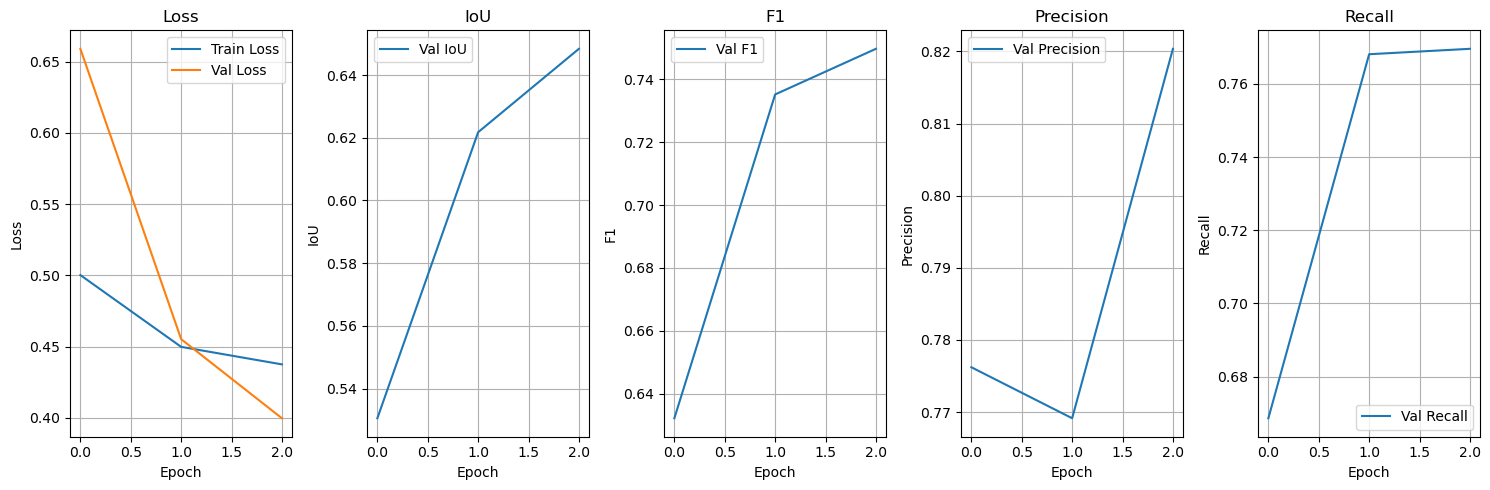


=== Performance Metrics Summary ===
IoU     - Best: 0.6484 | Final: 0.6484
F1      - Best: 0.7497 | Final: 0.7497
Precision - Best: 0.8204 | Final: 0.8204
Recall  - Best: 0.7696 | Final: 0.7696
Val Loss - Best: 0.3998 | Final: 0.3998



,epoch,train_loss,val_loss,val_iou,val_f1,val_precision,val_recall
0,1,0.500254,0.658974,0.530574,0.632132,0.776221,0.668606
1,2,0.449900,0.455311,0.621769,0.735216,0.769151,0.768102
2,3,0.437607,0.399817,0.648359,0.749743,0.820365,0.769585


In [6]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

## Run inference

You can run inference on a new image using the `semantic_segmentation` function. I don't have a new image to test on, so I'll use one of the training images. In reality, you would use your own images not used in training.

In [7]:
index = 3
test_image_path = f"{out_folder}/images/water_body_{index}.jpg"
ground_truth_path = f"{out_folder}/masks/water_body_{index}.jpg"
prediction_path = f"{out_folder}/prediction/water_body_{index}.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [8]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.jpg)
Processing image: 658x659
Processing 4 windows...


9it [00:01,  8.96it/s]                       

Raw predicted classes and counts: {0: 352071, 1: 81551}
Binary predicted classes and counts: {0: 352071, 255: 81551}
Inference completed in 1.04 seconds
Saved binary prediction to waterbody-dataset/prediction/water_body_3.png (PNG format to preserve exact values)


## Visualize the results

Plot saved to: waterbody-dataset/prediction/water_body_3_comparison.png


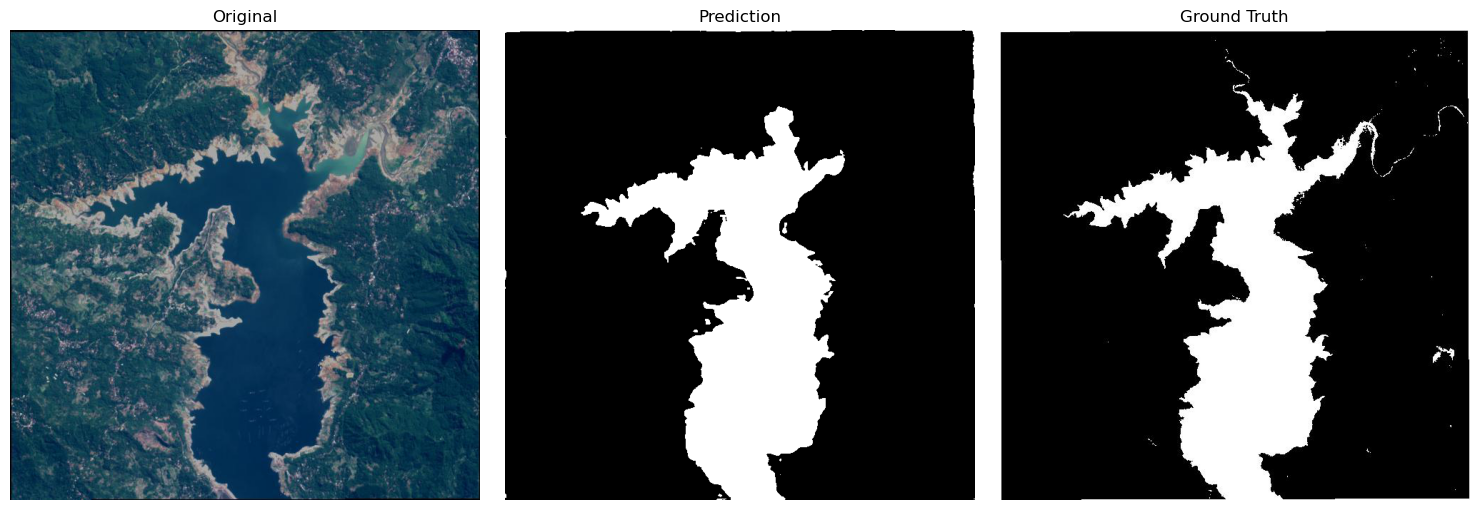

In [9]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_comparison.png",
    show_plot=True,
)

In [35]:

test_image_path = "/content/new samples/powai.png"
ground_truth_path = "/content/new samples/powai.png"
prediction_path = "/content/new samples/powai_prediction.png" # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [36]:
# Run semantic segmentation inference for powai.png
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.png)
Processing image: 864x788
Processing 9 windows...


16it [00:00, 37.39it/s]


Raw predicted classes and counts: {0: 650352, 1: 30480}
Binary predicted classes and counts: {0: 650352, 255: 30480}
Inference completed in 0.51 seconds
Saved binary prediction to /content/new samples/powai_prediction.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/powai_comparison.png


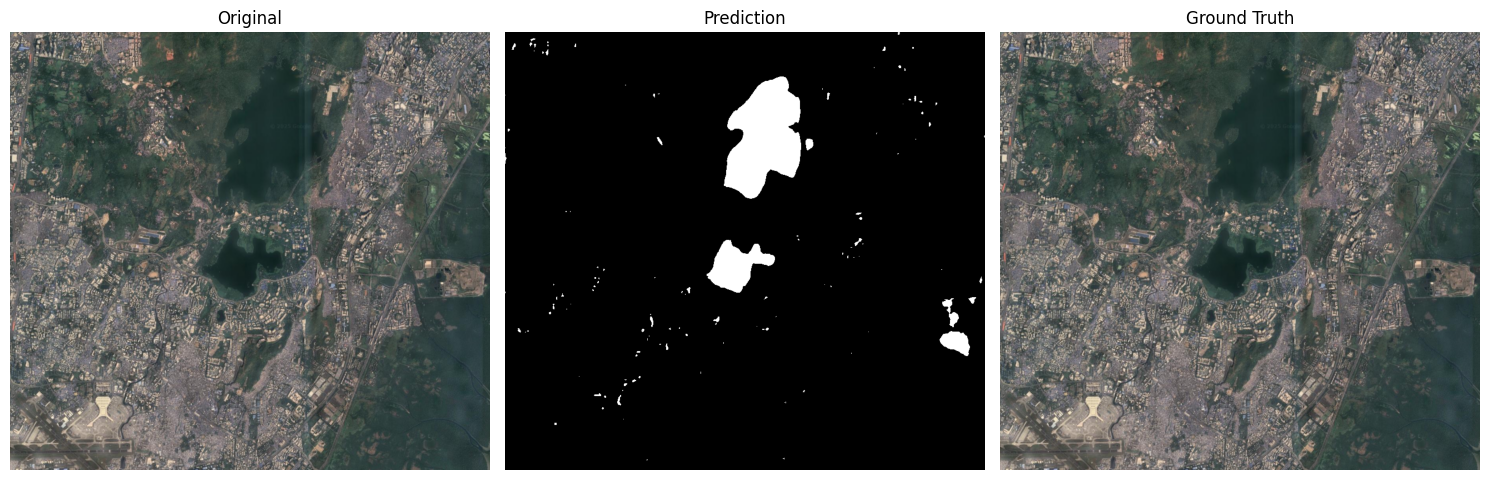

In [38]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/powai_comparison.png", # save path for powai.png
    show_plot=True,
)

In [ ]:
test_image_path = "/content/new samples/lake1.png"
ground_truth_path = "/content/new samples/lake1.png"
prediction_path = "/content/new samples/lake1_prediction.png" # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [ ]:
# Run semantic segmentation inference for powai.png
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.png)
Processing image: 863x760
Processing 6 windows...


12it [00:00, 33.93it/s]

Raw predicted classes and counts: {0: 588088, 1: 67792}
Binary predicted classes and counts: {0: 588088, 255: 67792}
Inference completed in 0.43 seconds
Saved binary prediction to /content/new samples/lake1_prediction.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/lake_comparison.png


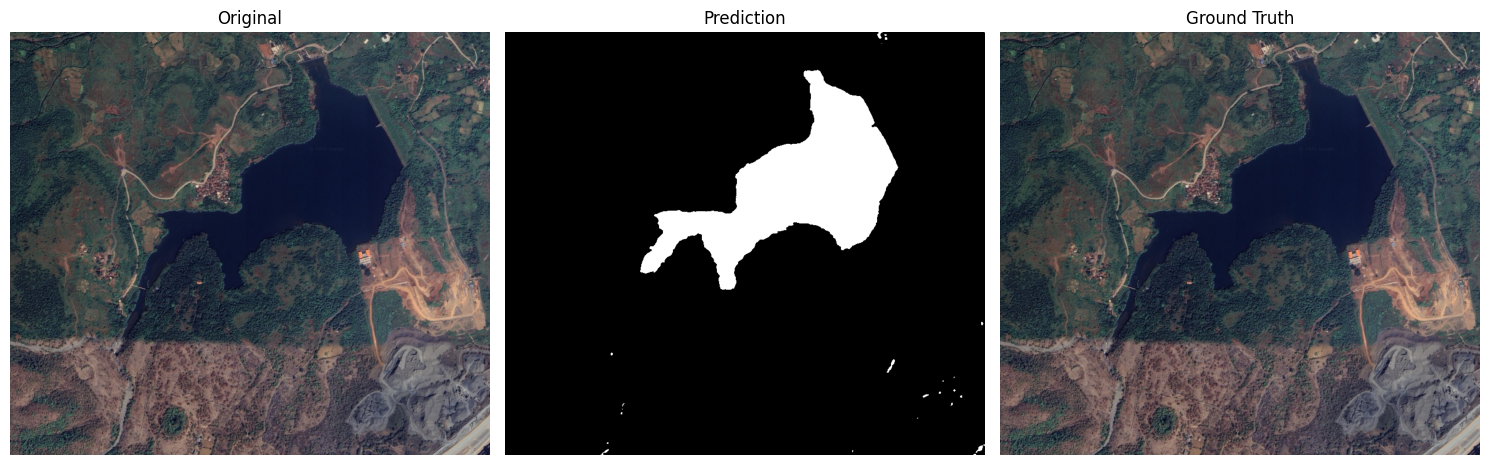

In [34]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/lake_comparison.png",
    show_plot=True,
)